# Figure 3.b

Calculating Figure 3b data...

Parameters: b=2; c=1; beta=1; delta=0.999
Number of q values: 251
q range: 1.00e-05 to 1.00


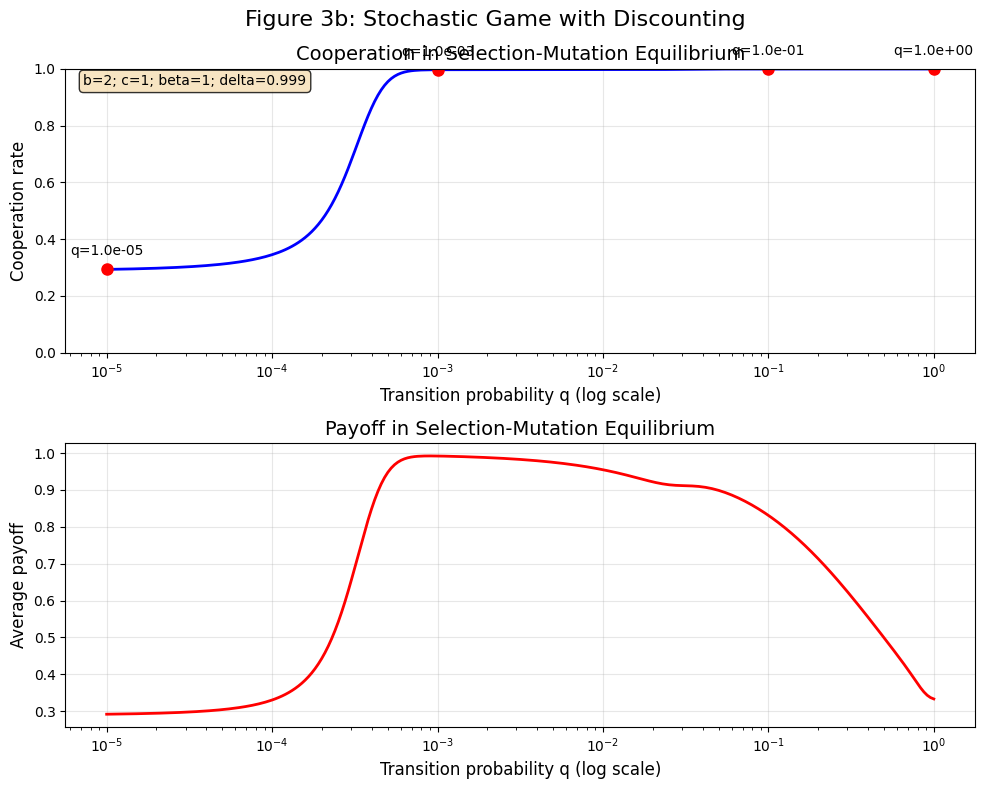


Results at key q values:
q=1.0e-05: coop=0.2936, pay=0.2919
q=1.0e-04: coop=0.3454, pay=0.3304
q=1.0e-03: coop=0.9964, pay=0.9919
q=1.0e-02: coop=0.9966, pay=0.9547
q=1.0e-01: coop=0.9990, pay=0.8310
q=1.0e+00: coop=0.9990, pay=0.3333


In [9]:
import numpy as np
from scipy.linalg import null_space
import matplotlib.pyplot as plt

# These functions are already defined and don't need changes
def payoff(p, q, qvec, delta, piv1, piv2):
    """
    payoff function from previous code - already translated
    """
    eps = 1e-3
    
    p = p * (1 - eps) + (1 - p) * eps
    q = q * (1 - eps) + (1 - q) * eps
    
    # Transforming the reduced strategies into (8+1)-dim strategies
    p = np.concatenate([p[0:4], p[0:4], [p[4]]])
    q = np.concatenate([q[0:4], q[0:4], [q[4]]])
    
    M = np.array([
        [qvec[0]*p[0]*q[0], qvec[0]*p[0]*(1-q[0]), qvec[0]*(1-p[0])*q[0], qvec[0]*(1-p[0])*(1-q[0]), 
         (1-qvec[0])*p[4]*q[4], (1-qvec[0])*p[4]*(1-q[4]), (1-qvec[0])*(1-p[4])*q[4], (1-qvec[0])*(1-p[4])*(1-q[4])],
        [qvec[1]*p[1]*q[2], qvec[1]*p[1]*(1-q[2]), qvec[1]*(1-p[1])*q[2], qvec[1]*(1-p[1])*(1-q[2]), 
         (1-qvec[1])*p[5]*q[6], (1-qvec[1])*p[5]*(1-q[6]), (1-qvec[1])*(1-p[5])*q[6], (1-qvec[1])*(1-p[5])*(1-q[6])],
        [qvec[1]*p[2]*q[1], qvec[1]*p[2]*(1-q[1]), qvec[1]*(1-p[2])*q[1], qvec[1]*(1-p[2])*(1-q[1]), 
         (1-qvec[1])*p[6]*q[5], (1-qvec[1])*p[6]*(1-q[5]), (1-qvec[1])*(1-p[6])*q[5], (1-qvec[1])*(1-p[6])*(1-q[5])],
        [qvec[2]*p[3]*q[3], qvec[2]*p[3]*(1-q[3]), qvec[2]*(1-p[3])*q[3], qvec[2]*(1-p[3])*(1-q[3]), 
         (1-qvec[2])*p[7]*q[7], (1-qvec[2])*p[7]*(1-q[7]), (1-qvec[2])*(1-p[7])*q[7], (1-qvec[2])*(1-p[7])*(1-q[7])],
        [qvec[3]*p[0]*q[0], qvec[3]*p[0]*(1-q[0]), qvec[3]*(1-p[0])*q[0], qvec[3]*(1-p[0])*(1-q[0]), 
         (1-qvec[3])*p[4]*q[4], (1-qvec[3])*p[4]*(1-q[4]), (1-qvec[3])*(1-p[4])*q[4], (1-qvec[3])*(1-p[4])*(1-q[4])],
        [qvec[4]*p[1]*q[2], qvec[4]*p[1]*(1-q[2]), qvec[4]*(1-p[1])*q[2], qvec[4]*(1-p[1])*(1-q[2]), 
         (1-qvec[4])*p[5]*q[6], (1-qvec[4])*p[5]*(1-q[6]), (1-qvec[4])*(1-p[5])*q[6], (1-qvec[4])*(1-p[5])*(1-q[6])],
        [qvec[4]*p[2]*q[1], qvec[4]*p[2]*(1-q[1]), qvec[4]*(1-p[2])*q[1], qvec[4]*(1-p[2])*(1-q[1]), 
         (1-qvec[4])*p[6]*q[5], (1-qvec[4])*p[6]*(1-q[5]), (1-qvec[4])*(1-p[6])*q[5], (1-qvec[4])*(1-p[6])*(1-q[5])],
        [qvec[5]*p[3]*q[3], qvec[5]*p[3]*(1-q[3]), qvec[5]*(1-p[3])*q[3], qvec[5]*(1-p[3])*(1-q[3]), 
         (1-qvec[5])*p[7]*q[7], (1-qvec[5])*p[7]*(1-q[7]), (1-qvec[5])*(1-p[7])*q[7], (1-qvec[5])*(1-p[7])*(1-q[7])]
    ])
    
    # Expected outcome for first round
    v0 = np.array([p[8]*q[8], p[8]*(1-q[8]), (1-p[8])*q[8], (1-p[8])*(1-q[8]), 0, 0, 0, 0])
    
    # Calculating the weighted average frequency to observe each outcome
    v = (1 - delta) * v0 @ np.linalg.inv(np.eye(8) - delta * M)
    v = v / np.sum(v)
    
    pi1 = np.dot(piv1, v)
    pi2 = np.dot(piv2, v)
    
    s1 = np.sum(v[0:4])
    cop1 = (v[0] + v[1]) / s1 if s1 > 0 else 0
    cop2 = (v[0] + v[2]) / s1 if s1 > 0 else 0
    
    return pi1, pi2, cop1, cop2, s1


def CalcRho(S1, S2, PayM, N, beta):
    """
    CalcRho function from previous code - already translated
    """
    alpha = np.zeros(N - 1)
    
    for j in range(1, N):
        pi1 = ((j - 1) / (N - 1)) * PayM[S1, S1] + ((N - j) / (N - 1)) * PayM[S1, S2]
        pi2 = (j / (N - 1)) * PayM[S2, S1] + ((N - j - 1) / (N - 1)) * PayM[S2, S2]
        alpha[j-1] = np.exp(-beta * (pi1 - pi2))
    
    cumprod_alpha = np.cumprod(alpha)
    Rho = 1 / (1 + np.sum(cumprod_alpha))
    
    return Rho


def CalcSMEquilibrium(qvec, piRound, beta, delta):
    """
    Modified version for Figure 3b (includes delta parameter)
    """
    N = 100
    
    pv1 = piRound.copy()
    pv2 = piRound.copy()
    pv2[1:3] = piRound[2:0:-1]
    pv2[5:7] = piRound[6:4:-1]
    
    n_strategies = 2**5
    Str = np.zeros((n_strategies, 5), dtype=int)
    
    for i in range(n_strategies):
        bin_str = format(i, f'0{5}b')
        Str[i] = list(map(int, bin_str))
    
    PayM = np.zeros((n_strategies, n_strategies))
    C = np.zeros((n_strategies, n_strategies))
    
    for i in range(n_strategies):
        for j in range(i, n_strategies):
            pi1, pi2, cop1, cop2, s1 = payoff(Str[i], Str[j], qvec, delta, pv1, pv2)
            PayM[i, j] = pi1
            PayM[j, i] = pi2
            C[i, j] = cop1
            C[j, i] = cop2
    
    T = np.zeros((n_strategies, n_strategies))
    
    for i in range(n_strategies):
        for j in range(n_strategies):
            T[i, j] = 1/(n_strategies-1) * CalcRho(j, i, PayM, N, beta)
        T[i, i] = 0
        T[i, i] = 1 - np.sum(T[i, :])
    
    v = null_space(T.T - np.eye(n_strategies))
    v = v / np.sum(v)
    v = v.flatten()
    freq = v
    
    coop = np.sum(freq * np.diag(C))
    pay = np.sum(freq * np.diag(PayM))
    
    return coop, pay, freq, Str


def GetEvolData():
    """
    Creates data for Figure 3b
    """
    beta = 1
    b = 2
    c = 1
    delta = 0.999
    
    # List of q-values: 10.^(-5:0.02:0)
    # This creates log-spaced values from 10^-5 to 10^0 = 1
    qPoss = 10 ** np.arange(-5, 0.02, 0.02)
    n = len(qPoss)
    
    piRound = np.array([b - c, -c, b, 0, 0, 0, 0, 0])
    coop = np.zeros(n)
    pay = np.zeros(n)
    
    Data = f"b={b}; c={c}; beta={beta}; delta={delta}"
    
    for i in range(n):
        q = qPoss[i]
        qvec = np.array([1, 1 - q, 1 - q, 0, 0, 0])
        coop[i], pay[i], _, _ = CalcSMEquilibrium(qvec, piRound, beta, delta)
    
    return qPoss, coop, pay, Data


def plot_figure_3b(qPoss, coop, pay, Data):
    """
    Plot Figure 3b results
    """
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
    
    # Plot 1: Cooperation rate (log scale for x-axis)
    ax1.semilogx(qPoss, coop, 'b-', linewidth=2)
    ax1.set_xlabel('Transition probability q (log scale)', fontsize=12)
    ax1.set_ylabel('Cooperation rate', fontsize=12)
    ax1.set_title('Cooperation in Selection-Mutation Equilibrium', fontsize=14)
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim([0, 1])
    
    # Add markers at special q values
    special_q = [1e-5, 1e-3, 1e-1, 1]
    for q in special_q:
        idx = np.argmin(np.abs(qPoss - q))
        ax1.plot(qPoss[idx], coop[idx], 'ro', markersize=8)
        ax1.text(qPoss[idx], coop[idx] + 0.05, f'q={q:.1e}', 
                ha='center', fontsize=10)
    
    # Plot 2: Payoff (log scale for x-axis)
    ax2.semilogx(qPoss, pay, 'r-', linewidth=2)
    ax2.set_xlabel('Transition probability q (log scale)', fontsize=12)
    ax2.set_ylabel('Average payoff', fontsize=12)
    ax2.set_title('Payoff in Selection-Mutation Equilibrium', fontsize=14)
    ax2.grid(True, alpha=0.3)
    
    # Add parameter information
    ax1.text(0.02, 0.98, Data, transform=ax1.transAxes,
             fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    plt.suptitle('Figure 3b: Stochastic Game with Discounting', fontsize=16)
    plt.tight_layout()
    plt.show()
    
    return fig


# Main execution
if __name__ == "__main__":
    print("Calculating Figure 3b data...")
    qPoss, coop, pay, Data = GetEvolData()
    
    print(f"\nParameters: {Data}")
    print(f"Number of q values: {len(qPoss)}")
    print(f"q range: {qPoss[0]:.2e} to {qPoss[-1]:.2f}")
    
    plot_figure_3b(qPoss, coop, pay, Data)
    
    # Print results at key q values
    print("\nResults at key q values:")
    for q in [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]:
        idx = np.argmin(np.abs(qPoss - q))
        print(f"q={q:.1e}: coop={coop[idx]:.4f}, pay={pay[idx]:.4f}")